**ref:** [PHILLIP HEITA](https://www.kaggle.com/code/phillipheita/storytelling-with-data/notebook)

## Storytelling with data: the cognitive considerations behind data visualisation 

In most cases, analytics starts with the `exploratory phase` - **understand & figure out which insights are noteworthy or might be interesting to others** 

However, presenting the results from an `EDA` requires **you to have a specific conclusion that you want to explain to your target audience - a story you want to tell**

- Objective: Turning raw data into information that can be **consumed by an audience with relative ease**

### Contents  <a class="anchor" id="sections"></a>

- [Step 1. Who, What, How](#section1)
- [Step 2. Choosing an appropriate display](#section2)
- [Step 3. Dealing with clutter](#section3)
- [Step 4. Draw attention where you want it](#section4)
- [Step 5. Think like a designer](#section5)

In [1]:
## Import libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style()

%config InlineBackend.figure_format = 'retina'

## Warnings
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

### Step 1. Who, What, How <a class="anchor" id="section1"></a>

- Success in data visualization does not start with data visualization. Rather, before you begin down the path of creating a data visualization or communication, attention & time should be paid to **understanding the context for the need to communicate**

#### There are 3 key steps to this: 

- 1. `Who`
    - Who is your audience? & the relationship you have with your audience?
    
- 2. `What`
    - What does your audience want / need to know?
    
- 3. `How` 
    - How will you tell that story
    
    
#### 1-1. Example

- In the past year, the IT department has let a couple of people go 
- The remaining employees had to "pick up the slack"

**Q. The hiring manager would like to understand what impact the departure of the individuals has had over the past year.**

- 1. Plot the monthly volume of calls logged & resolved over the past calendar year
- 2. Find evidence of productivity suffering from being short-staffed
- 3. Turn a quick visual into a story to support their hiring request

In [2]:
## Months 
months = ['January','February','March','April','May','June',
          'July','August','September','October','November','December']

## Months v2
months_2 = ['Jan','Feb','Mar','Apr','May','Jun',
            'Jul','Aug','Sep','Oct','Nov','Dec']

## DataFrame
df = pd.DataFrame({'Month':['January','February','March','April','May','June',
                              'July','August','September','October','November','December'],
                     'Ticket_Volume_Received':[160,184,241,149,180,161,
                                               132,202,160,139,149,177],
                     'Ticket_Volume_Processed':[160,184,237,148,181,150,
                                                123,156,126,104,124,140]})
df

,Month,Ticket_Volume_Received,Ticket_Volume_Processed
0,January,160,160
1,February,184,184
2,March,241,237
3,April,149,148
4,May,180,181
5,June,161,150
6,July,132,123
7,August,202,156
8,September,160,126
9,October,139,104


### Step 2. Choosing an appropriate display <a class="anchor" id="section2"></a>

#### What is the right graph? The answer is always the same: `Whichever is easiest for your audience to read.`

- There are many different types of graphs & visual displays, **however just because you have numbers does not always mean you need a graph** 

- Simple text is a great way to communicate too

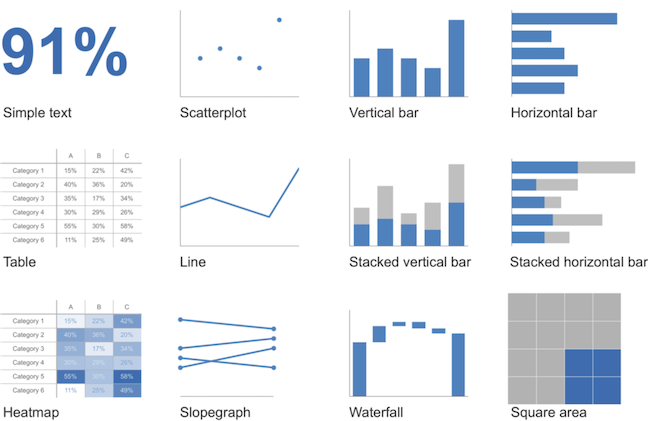

#### 2-1. Example: Stacked Bar Plot

In [3]:
df

,Month,Ticket_Volume_Received,Ticket_Volume_Processed
0,January,160,160
1,February,184,184
2,March,241,237
3,April,149,148
4,May,180,181
5,June,161,150
6,July,132,123
7,August,202,156
8,September,160,126
9,October,139,104


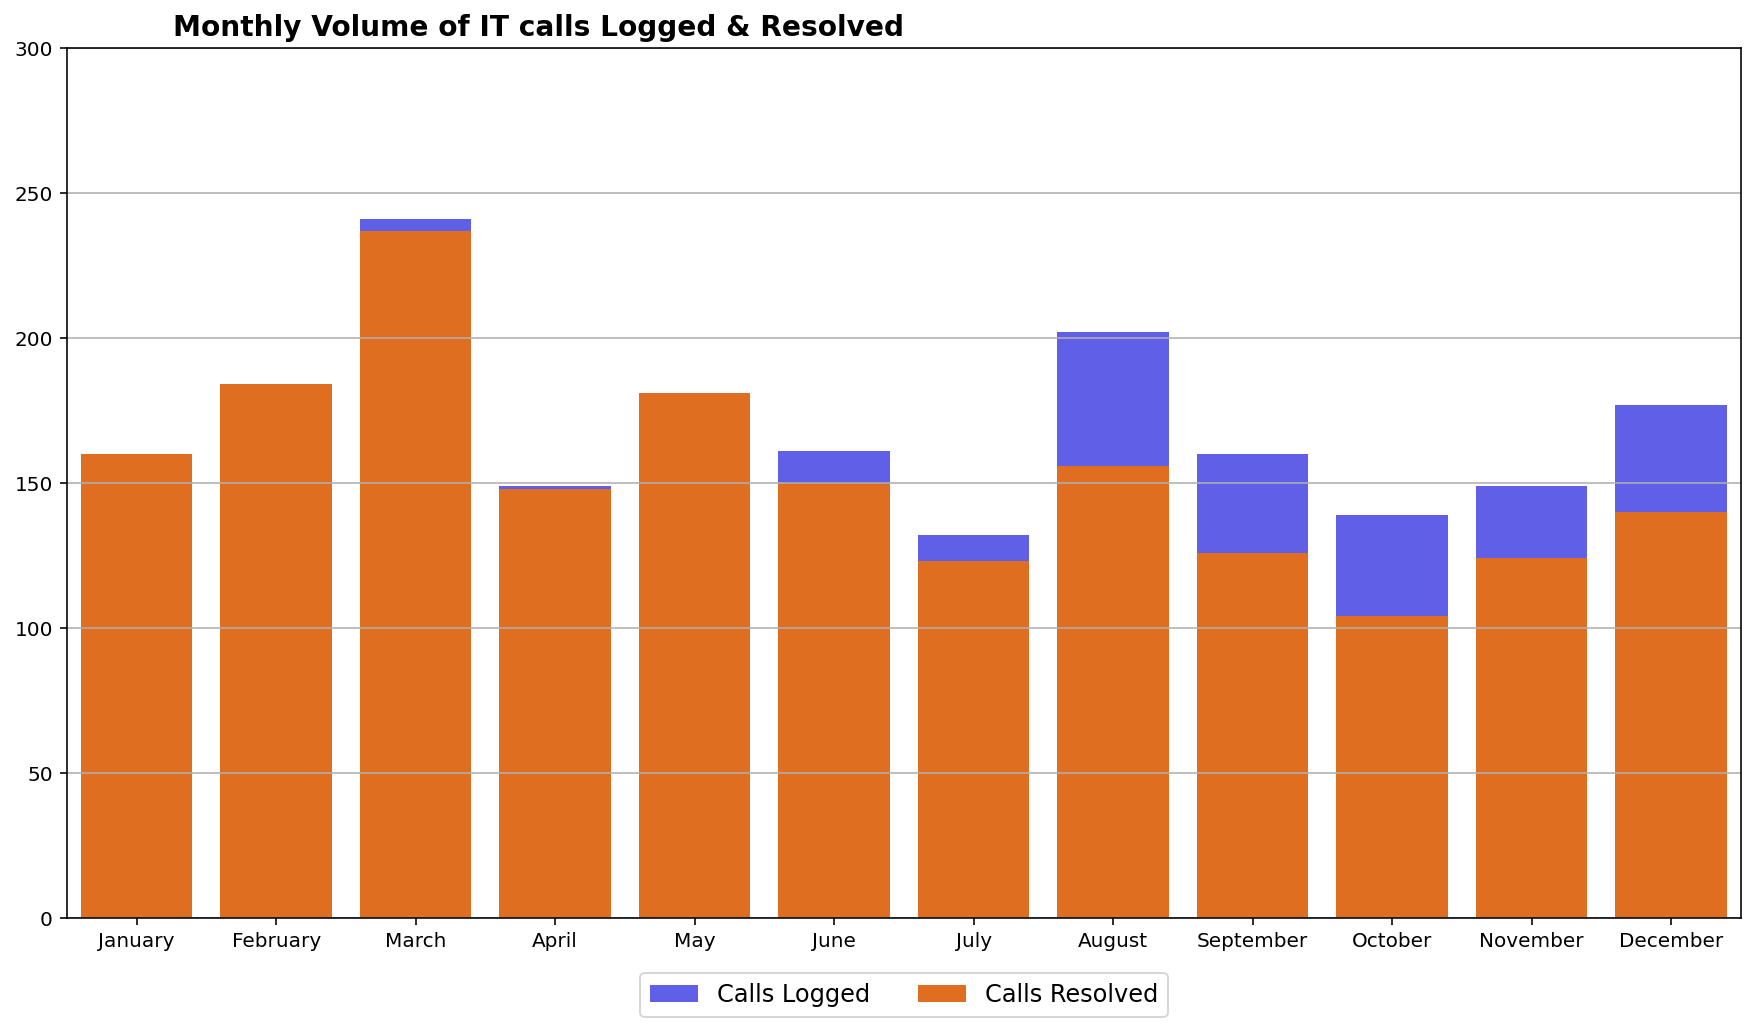

In [4]:
## Fig
fig = plt.figure(figsize=(15, 8))
## Ax
ax = fig.add_subplot(111)

## Variables to plot
sns.barplot(x=df.index, y=df['Ticket_Volume_Received'] , data=df, label='Calls Logged', color='#4848FF', ax=ax)
sns.barplot(x=df.index, y=df['Ticket_Volume_Processed'], data=df, label='Calls Resolved', color='#FF6800', ax=ax)

## Title
plt.title('Monthly Volume of IT calls Logged & Resolved', fontsize=14, ha='right', fontweight='bold')

## Plot legend
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=False, ncol=2, fontsize=12)

## Plot grid on y axis
plt.grid(axis='y')

## Hide y axis label
plt.ylabel('')

## Set y axis range
plt.ylim(0,300)

## Set x axis ticks
ax.set(xticks=range(0, 12), xticklabels=list(months));

#### 2-2. Example: Lineplot

The line plot is easier to read - given that we are plotting a time series.
However, there is a lot of clutter.


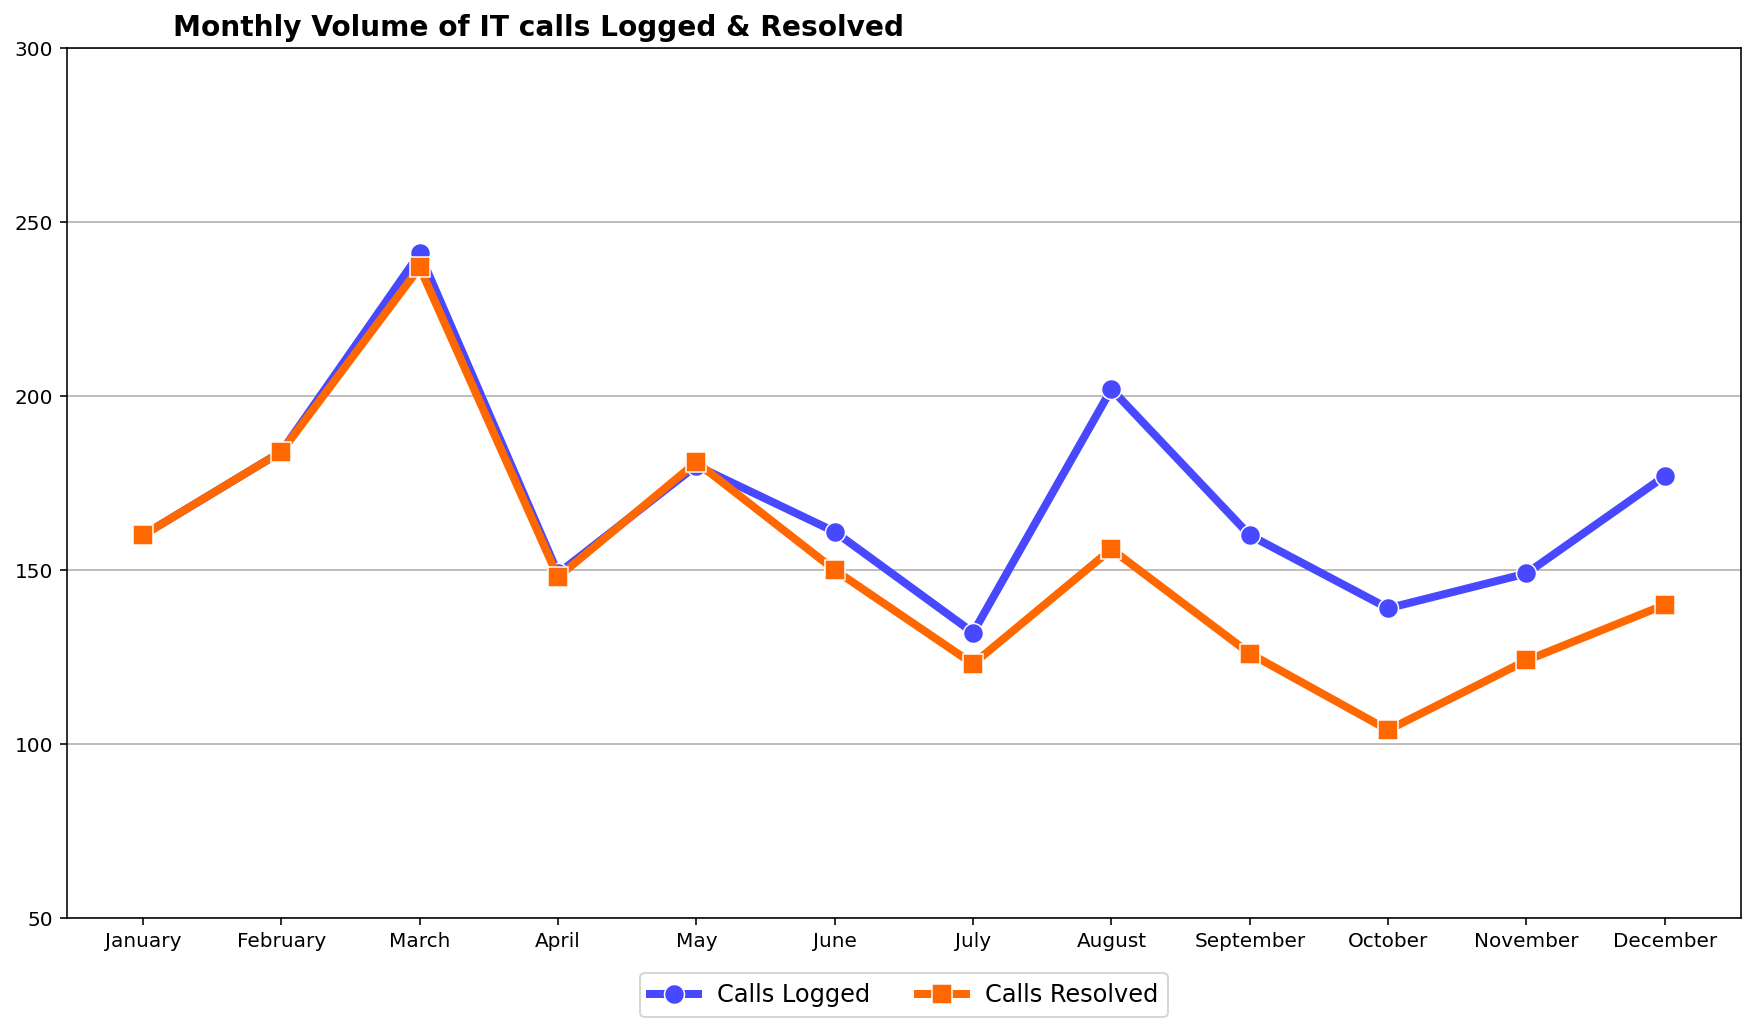

In [5]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111)

sns.lineplot(x=df.index, y=df['Ticket_Volume_Received'], data=df, marker='o',
             markersize=10, lw=4, label='Calls Logged', color='#4848FF', ax=ax)

sns.lineplot(x=df.index, y=df['Ticket_Volume_Processed'], data=df, marker='s',
             markersize=10, lw=4, label='Calls Resolved', color='#FF6800', ax=ax)

plt.title('Monthly Volume of IT calls Logged & Resolved', fontsize=14, ha='right', fontweight='bold')

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=False, ncol=2, fontsize=12)

plt.grid(axis='y')

plt.ylabel('')

plt.ylim(50, 300)

ax.set(xticks=range(0, 12), xticklabels=list(months));

print('The line plot is easier to read - given that we are plotting a time series.')
print('However, there is a lot of clutter.')

### Step 3. Dealing with clutter <a class="anchor" id="section3"></a>

- Every single element added to a visual contributes to **cognitive load** for your audience, that is - **the mental effort required to learn new information**


- These are visual elements that take up space but don't increase understanding are known as **clutter**

#### 3-1. Removing clutter -  Example: Lineplot v2

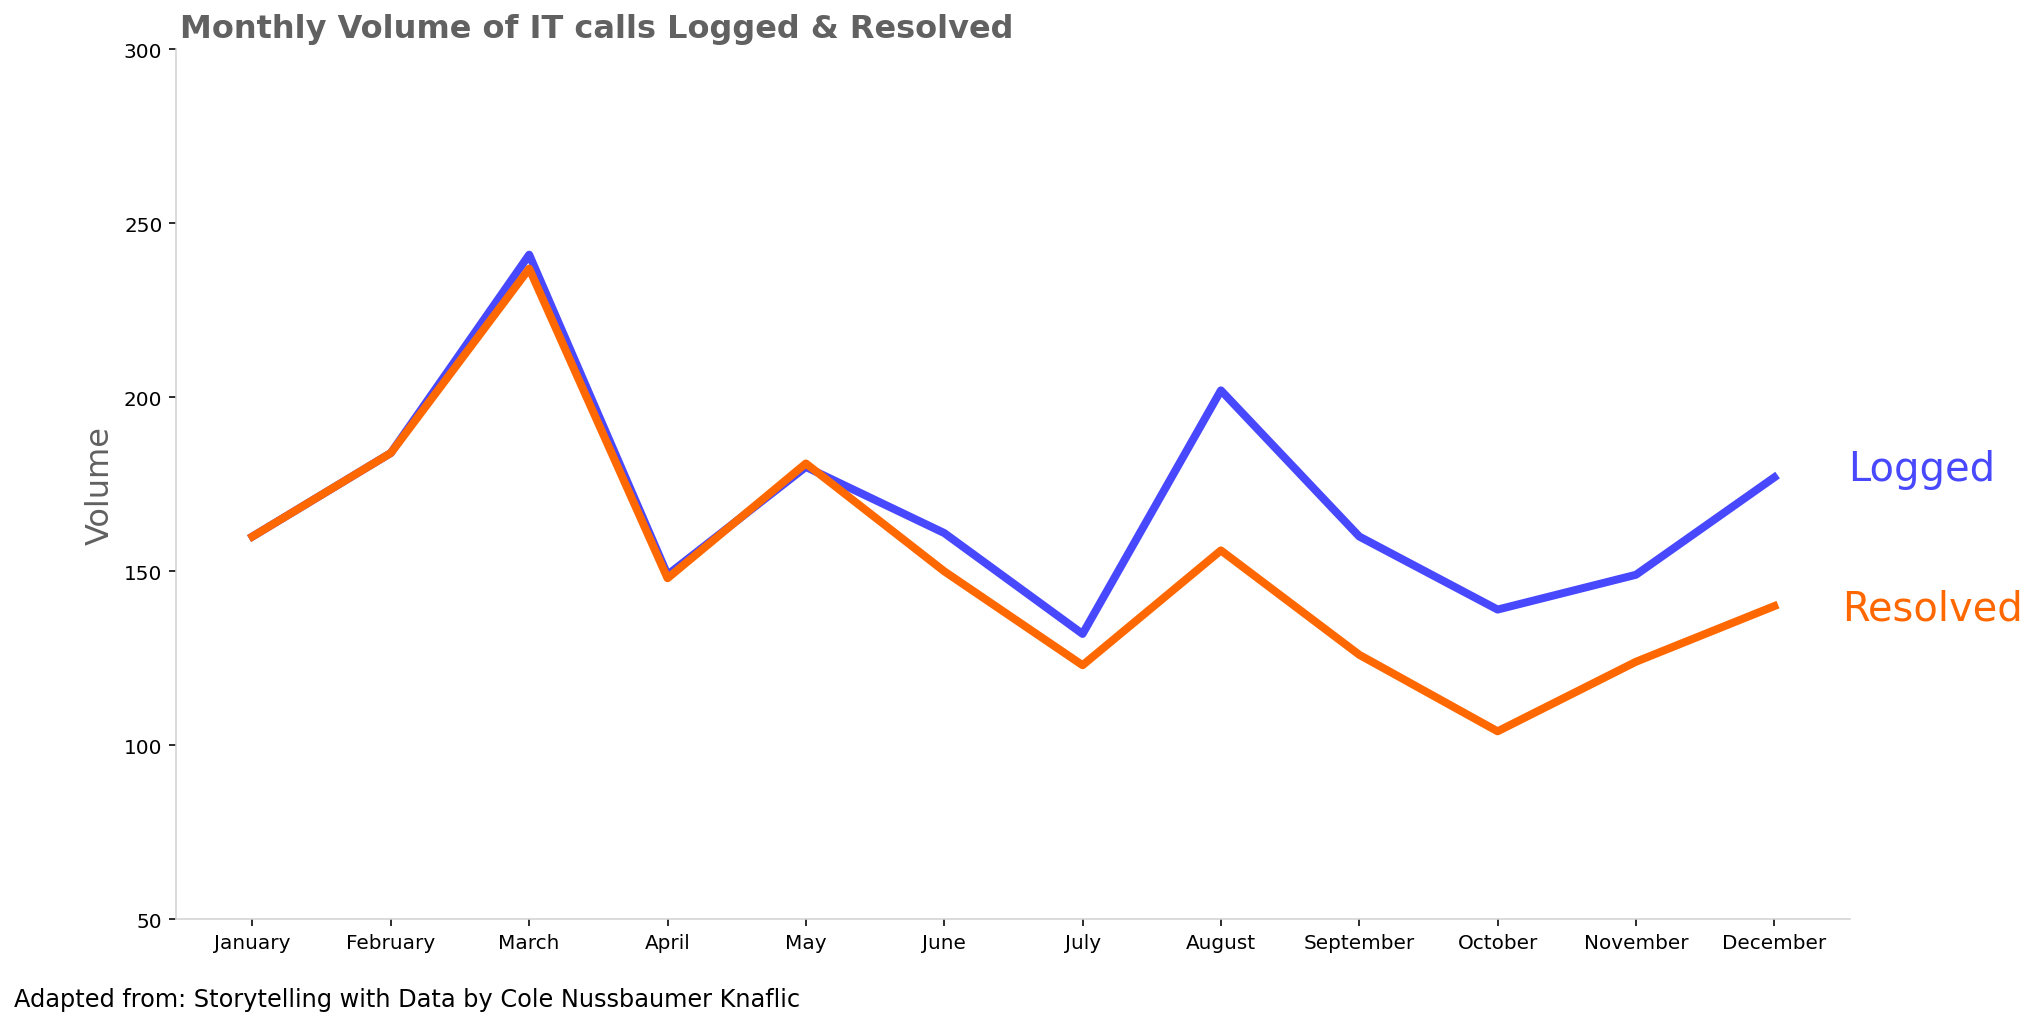

In [6]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111)

sns.lineplot(x=df.index, y=df['Ticket_Volume_Received'], data=df, lw=4, color='#4848FF', ax=ax)

sns.lineplot(x=df.index, y=df['Ticket_Volume_Processed'], data=df, lw=4, color='#FF6800', ax=ax)

plt.title('Monthly Volume of IT calls Logged & Resolved', fontsize=16, 
          ha='right', fontweight='bold', color='#616161')

sns.despine()

## Changes the color of the left & bottom borders
ax.spines['left'].set_color('lightgray')
ax.spines['bottom'].set_color('lightgray')

ax.text(12.6, 185, 'Logged', ha='right', va='top', fontsize=20, color='#4848FF')
ax.text(12.8, 145, 'Resolved', ha='right', va='top', fontsize=20, color='#FF6800')

plt.ylabel('')
plt.ylim(50, 300)

ax.set(xticks=range(0, 12), xticklabels=list(months))

plt.ylabel('Volume', fontsize=16, color='#616161')

fig.text(0.05, 0.05, 'Adapted from: Storytelling with Data by Cole Nussbaumer Knaflic', ha='left',fontsize=12);

### Step 4. Drawing attention to where you want it <a class="anchor" id="section4"></a>

- **Preattentive processing** takes place in sensory memory - it requires no conscious effort from the user / viewer 


- This is crucial for information visualisation design - it enables you to grab the attention of the user / viewer without relying on their ablilty to successfully process the information in front of them

#### Preattentive attributes can be used to: 

- Help direct / guide your audiences' attention to where you specifically want them to focus it

In [7]:
## Calls Logged
y = [202, 160, 139, 149, 177]
x = [7, 8, 9, 10, 11]

## Calls Resolved
y1 = [156, 126, 104, 124, 140]
x1 = [7, 8, 9, 10, 11]

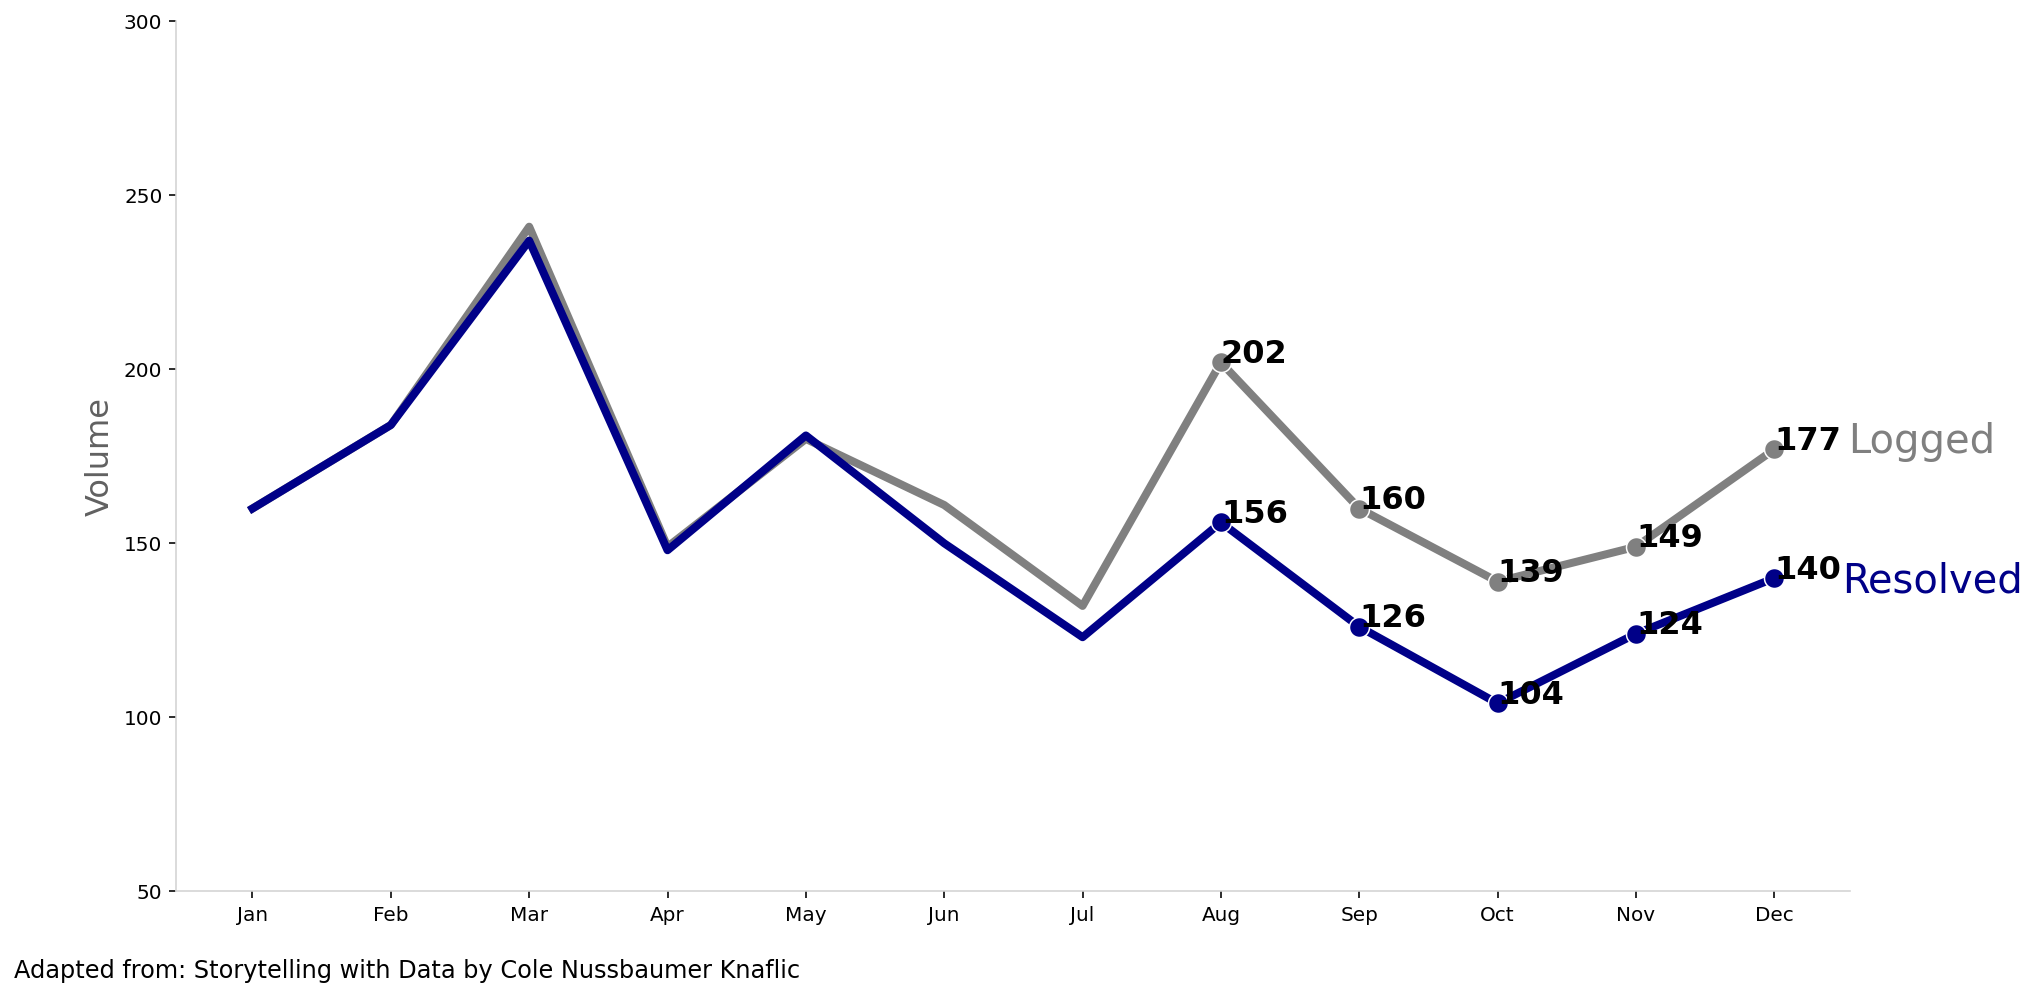

In [8]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111)

sns.lineplot(x=df.index, y=df['Ticket_Volume_Received'], data=df, lw=4, color='#808080', ax=ax)
sns.lineplot(x=df.index, y=df['Ticket_Volume_Processed'], data=df, lw=4, color='#000088', ax=ax)

sns.lineplot(x, y, marker='o', markersize=10, color='#808080', ax=ax)
sns.lineplot(x1, y1, marker='o', markersize=10, color='#000088', ax=ax)

sns.despine()
ax.spines['left'].set_color('lightgray')
ax.spines['bottom'].set_color('lightgray')

ax.text(12.6, 185, 'Logged', ha='right', va='top', fontsize=20, color='#808080')
ax.text(12.8, 145, 'Resolved', ha='right', va='top', fontsize=20, color='#000088')

plt.ylabel('')
plt.ylim(50, 300)

ax.set(xticks=range(0, 12), xticklabels=list(months_2))

## Markers on
for i, v in enumerate(y):
    ax.annotate(v, (x[i], y[i]), fontsize=16, fontweight='bold')

## Markers on
for i, v in enumerate(y1):
    ax.annotate(v, (x1[i], y1[i]), fontsize=16, fontweight='bold')
    
plt.ylabel('Volume', fontsize=16, color='#616161')

fig.text(0.05, 0.05, 'Adapted from: Storytelling with Data by Cole Nussbaumer Knaflic', ha='left',fontsize=12);

### Step 5. Think like a designer <a class="anchor" id="section5"></a>

#### In the graph above, attention is drawn to  `Received` & `Processed`  call volume starting to differ significantly around August

The following are important considerations when constructing a graph for your target audience:

- highlight important information
- eliminate any visual distractions
- understand what the audience wants to do with the data & create a visualisation that allows for this 
- do not overcomplicate, your visualisation should be accessible to everyone
- make graphs simple, yet aesthetically pleasing
- always use text to label, introduce, explain, reinforce, highlight, recommend & ultimately **TELL A STORY!**

#### Applying all of these principles above yields the following graph for your target audience:

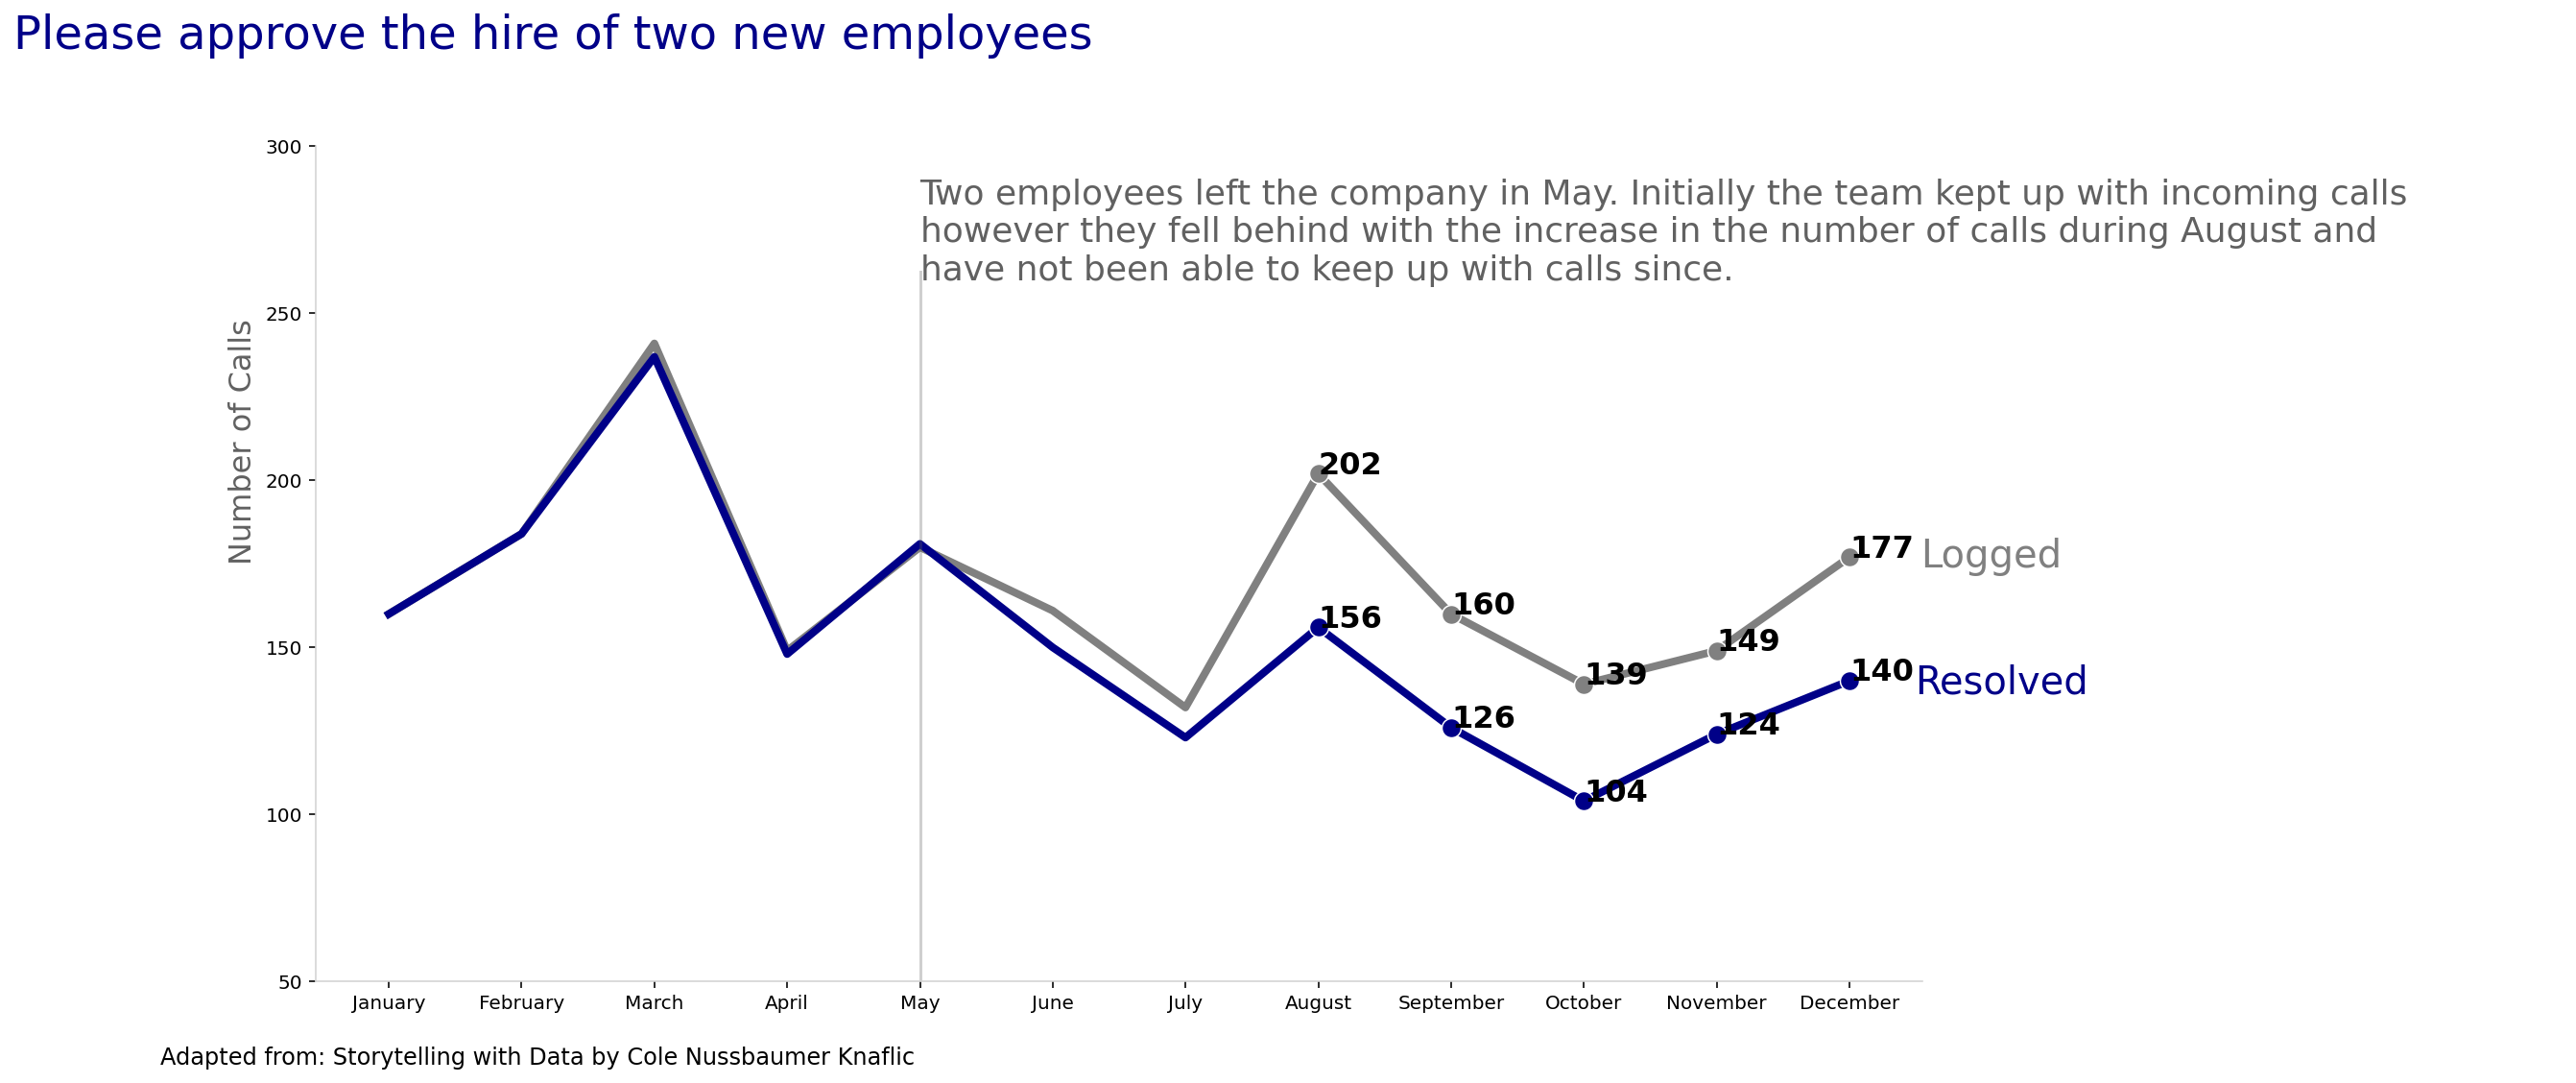

In [10]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111)

sns.lineplot(x=df.index, y=df['Ticket_Volume_Received'], data=df, lw=4, color='#808080', ax=ax)
sns.lineplot(x=df.index, y=df['Ticket_Volume_Processed'], data=df, lw=4, color='#000088', ax=ax)

## Markers
sns.lineplot(x, y, marker='o', markersize=10, color='#808080', ax=ax)
sns.lineplot(x1, y1, marker='o', markersize=10, color='#000088', ax=ax)

## Suptitle
plt.suptitle('Please approve the hire of two new employees', fontsize=24, ha='right', va='top', color='#000088', y=1)

## Despine
sns.despine()

## Axis spines
ax.spines['left'].set_color('lightgray')
ax.spines['bottom'].set_color('lightgray')

## Axis text
ax.text(12.6, 183, 'Logged', ha='right', va='top', fontsize=20, color='#808080')
ax.text(12.8, 145, 'Resolved', ha='right', va='top', fontsize=20, color='#000088')

## Text
plt.annotate("Two employees left the company in May. Initially the team kept up with incoming calls \
             \nhowever they fell behind with the increase in the number of calls during August and \
             \nhave not been able to keep up with calls since."
             , xy=(4, 80), xytext=(4, 260), color='#616161', fontsize=18)

## y axis label
plt.ylabel('')
plt.ylim(50, 300)

## Attach a vertical line
plt.axvline(x=4, ymin=0, ymax=0.85, color='#616161', alpha=0.3)

ax.set(xticks=range(0, 12), xticklabels=list(months))

plt.ylabel('Number of Calls', fontsize=16, color='#616161', ha='left', va='bottom')

for i, v in enumerate(y):
    ax.annotate(v, (x[i], y[i]), fontsize=16, fontweight='bold')
    
for i, v in enumerate(y1):
    ax.annotate(v, (x1[i], y1[i]), fontsize=16, fontweight='bold')
    
fig.text(0.05, 0.05, 'Adapted from: Storytelling with Data by Cole Nussbaumer Knaflic', ha='left',fontsize=12);

[Return to contents](#sections)